In [3]:
pip install pandas

     |████████████████████████████████| 11.1 MB 1.8 MB/s eta 0:00:01
     |████████████████████████████████| 17.6 MB 3.0 MB/s eta 0:00:01     |████████████████████████▍       | 13.5 MB 1.3 MB/s eta 0:00:04
     |████████████████████████████████| 503 kB 3.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


#### TASK-1 Prediction Using Supervised Machine Learning

In [4]:
pip install numpy

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


#### Perform exploratory data analysis on dataset 'Student' to predict the percentage of marks of the students based on the number of hours they studied

### Dataset sample: http://bit.ly/w-data

In [5]:
pip install matplotlib

     |████████████████████████████████| 7.3 MB 3.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 5.7 MB/s  eta 0:00:01
     |████████████████████████████████| 900 kB 9.4 MB/s eta 0:00:01
     |████████████████████████████████| 3.1 MB 8.8 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

     |████████████████████████████████| 292 kB 621 kB/s eta 0:00:01
     |████████████████████████████████| 55.6 MB 1.5 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install scikit-learn

     |████████████████████████████████| 8.0 MB 7.3 MB/s eta 0:00:01
     |████████████████████████████████| 306 kB 10.6 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.10/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Importing the required libraries 

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error 

### Reading the data

In [7]:
data = pd.read_csv('http://bit.ly/w-data') 
data.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [8]:
# check if there any null value in the Dataset
data.isnull == True

False

#### There is no null value in the Dataset so, we can now visualize our Data.


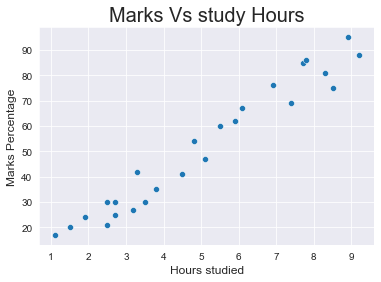

In [9]:
sns.set_style('darkgrid') 
sns.scatterplot(y = data['Scores'], x= data['Hours']) 
plt.title('Marks Vs study Hours' , size=20)
plt.ylabel('Marks Percentage' , size=12)
plt.xlabel('Hours studied' , size=12)
plt.show()

#### From the above scatter plot there looks to be correlation between the MARKS PERCENTAGE AND THE HOURS STUDIED, Lets plot a regression line to confirm the correlation.

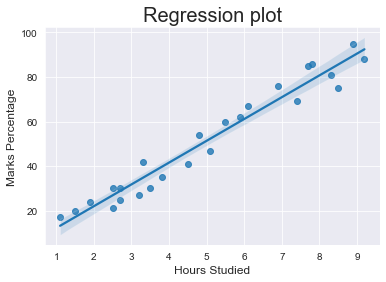

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [11]:
sns.regplot(x= data['Hours'], y= data['Scores'])
plt.title('Regression plot' ,size= 20)
plt.ylabel('Marks Percentage' , size=12)
plt.xlabel('Hours Studied' , size=12)
plt.show()
print(data.corr())

#### It is confirmed that the variable are positively correlated.

#### Training the model


#### 1) Splitting the data

In [12]:
# Defining X and y from the data

X = data.iloc[:,:-1].values
y = data.iloc[:, 1].values

#splitting the data into two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)


#### 2) Fitting the data into the model

In [13]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("----------Model Trained------------")

----------Model Trained------------


#### Predicting the percentage of marks

In [14]:
pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks' : [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


#### Comparing the Predicted Marks with the actual marks

In [15]:
compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


#### Visually comparing the Predicted Marks with the actual Marks

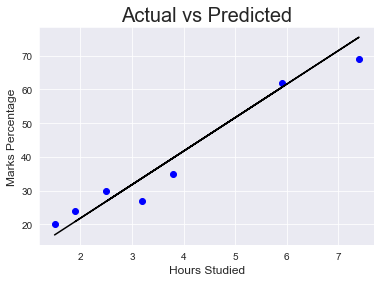

In [16]:
plt.scatter(x=val_X, y=val_y, color='blue')
plt.plot(val_X, pred_y, color='Black')
plt.title ('Actual vs Predicted', size = 20)
plt.ylabel('Marks Percentage', size = 12)
plt.xlabel('Hours Studied', size = 12)
plt.show()

#### Evaluating the Model

In [17]:
# calculating the accuracy of the model
print ('Mean Absolute Error :', mean_absolute_error(val_y, pred_y))

Mean Absolute Error : 4.130879918502482


#### Small value of mean absolue error states that the chances of error or wrong forecasting through the model are very less

#### What will be the predicted score of the student if he/she studies for 9.25 hrs/day?

In [18]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


#### According to the regression model if a student studies for 9.25 hours a day he/she is likely to score 93.89 marks